In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/xlisouski/DataCoder/main/train.csv'
df = pd.read_csv(url, sep = ',')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Puntos cruciales para preparar los datos para modelar: 

1. Chequear si existen registros **duplicados**, o combinaciones de columnas duplicadas que no deberían existir. --> **TOMAR DECISIÓN:** Elimino? Cuál registro priorizo? 
<br></br>
2. Valores **vacíos**: Ningún algoritmo suele admitir que se entreguen valores vacíos en el data frame. --> **ESTRATEGIA:** Elimino la columna? Relleno vacíos? 
<br></br>
3. Tipo de dato: Generalmente los algoritmos de ML necesitan recibir **SOLO NÚMEROS**. --> Variables categóricas? Transformaciones? 

# Duplicados 
Como buena práctica, primero exploremos si existen filas duplicadas en el dataset. 

In [5]:
df.duplicated().value_counts()

False    1460
dtype: int64

In [6]:
df['Id'].duplicated().value_counts()

False    1460
Name: Id, dtype: int64

### Conclusión: 
No existen filas duplicadas, por lo que no es necesario eliminar registros. Si existieran duplicados y quisiera eliminarlos, puedo hacerlo usando la siguiente sentencia: 

In [9]:
df = df.drop_duplicates()
print(df.shape)

(1460, 81)


# Missing Values

In [10]:
# Primera exploración: 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [11]:
# Columnas nulos
nulos = df.isnull().sum()
nulos_pct = nulos / df.shape[0]
nulos_resumen = pd.DataFrame({'Cant_Nulos': nulos,
                              'Pct_Nulos': nulos_pct})
nulos_resumen = nulos_resumen.loc[nulos_resumen['Cant_Nulos'] > 0,]
nulos_resumen = nulos_resumen.sort_values(by = 'Cant_Nulos',ascending=False)
nulos_resumen

,Cant_Nulos,Pct_Nulos
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479


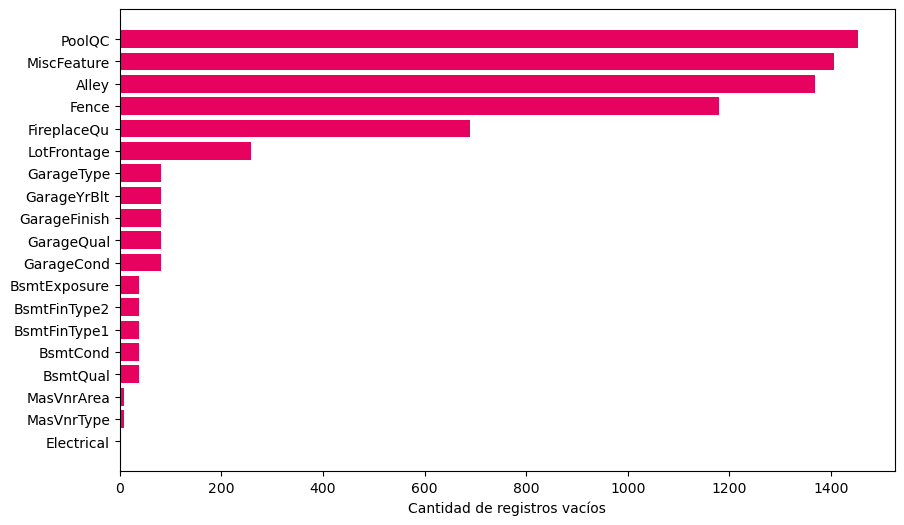

In [12]:
# Graficamente: 
plt.figure(figsize=(10,6))
plt.barh(nulos_resumen.index, 
         nulos_resumen['Cant_Nulos'],
         color = '#E70260')
plt.xlabel('Cantidad de registros vacíos')
plt.gca().invert_yaxis()  
plt.show()

### Conclusiones: 
Hay que recorrer variable por variable para tomar la decisión más adecuada en cada caso. 
<br></br>
*Algunas decisiones generales*:
1. Features con más del 50% del total de registros vacíos: *ELIMINARLAS* (no tienen suficiente presencia de datos como para detectar patrones). Estas son: PoolQC, MiscFeature, Alley y Fence. 
2. Features categóricas: En principio estudiar el caso particular, pero a nivel general se asigna la categoría "desconocido" a los valores vacíos.
3. Features numéricas. En principio estudiar el caso particular, pero a nivel general asignar mediana o interpolar. 

## 1) Eliminar features con más del 50% de registros vacíos:

In [ ]:
col_del = ['PoolQC','MiscFeature','Alley','Fence','Id'] 
train_x = df.drop(labels = col_del, axis=1)
train_x.shape

## 2) Reemplazar por categoría "Desconocido": 

In [ ]:
col_cat= ['FireplaceQu','GarageFinish','GarageCond','GarageType','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond',
          'BsmtQual','MasVnrType','Electrical','GarageQual']
for i in col_cat: # Reemplazar los vacios por Desconocido
  train_x[i] = train_x[i].fillna('Desconocido') 

In [ ]:
# Veamos un ejemplo de cómo queda: 
train_x['GarageCond'].value_counts()

## 3) Reemplazar por la mediana: 

In [ ]:
col_num = ['LotFrontage','GarageYrBlt','MasVnrArea'] 
for i in col_num: 
  train_x[i] = train_x[i].fillna(train_x[i].median())

## Verifico que ya no existan valores nulos: 

In [ ]:
nulos = train_x.isnull().sum()
nulos[nulos>0]

# Transformaciones
1. **Categóricas:** Puedo usar técnica ONE-HOT Encoding o LABEL Encoding
2. **Numéricas:** Puedo relacionarlas, transformar a logaritmo u otras, categorizarlas y luego usar alguna técnica de encoding.